<a href="https://colab.research.google.com/github/renatamontanhana/Analise-de-satisfacao-dos-clientes-do-e-commerce-com-PLN/blob/main/PLN_An%C3%A1lise_de_Satisfa%C3%A7%C3%A3o_dos_Clientes_do_E_commerce_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> PLN - Análise de Satisfação dos Clientes do E-commerce</font>


**Olist**: “A plataforma olist está presente nos principais canais online do Brasil. É a maior loja de departamentos no mercado brasileiro.
 www.olist.com


![alt text](https://i.imgur.com/JuJMns1.png)
![alt text](https://olist.com/wp-content/uploads/2020/02/lojas-de-celulares-e-smartphones-790x1024.jpg)

#1° - Problema de Negócio - Entendendo seus clientes



1. Precisamos compreender as avaliações dos clientes pois elas são cruciais para o sucesso de uma empresa.

2. Precisamos avaliar o sentimento do cliente em relação à marca.

A análise dos comentários ajuda a discernir adequadamente as diferentes preferências, gostos, desgostos, etc. do cliente. Esses insights extraídos podem ser usados ​​para melhorar o serviço e a experiência do cliente.


# 2° - Análise Exploratória dos Dados



## **Fonte de Dados**:

 Este é um conjunto de dados público de comércio eletrônico brasileiro de pedidos feitos na Olist Store. O conjunto de dados contém informações de 100 mil pedidos de 2016 a 2018 feitos em diversos mercados no Brasil.

Seus recursos permitem a visualização de um pedido em múltiplas dimensões: desde o status do pedido, preço, desempenho de pagamento e frete até a localização do cliente, atributos do produto e, **finalmente, avaliações escritas pelos clientes**. Também lançamos um conjunto de dados de geolocalização que relaciona os códigos postais brasileiros às coordenadas lat / lng.


Estes **são dados comerciais reais**, foram anonimizados e as referências às empresas e parceiros no texto da avaliação foram substituídas pelos nomes das grandes casas de Game of Thrones.


 https://www.kaggle.com/olistbr/brazilian-ecommerce

In [3]:
# Importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK tools for text processing
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [6]:

# Reading in the reviews dataset
review_df = pd.read_csv('/content/olist_order_reviews_dataset.csv')
review_df.head()
review_df.shape

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


(72726, 7)

In [ ]:
# We have missing values in the reviews and their titles
review_df.isnull().sum()

#3° Pré-Processamento


Em seguida, leríamos nossos dados e realizaríamos algumas modificações iniciais no EDA e no conjunto de dados. O conjunto de dados de revisão tem uma quantidade significativa de valores NaN no texto e no título das revisões, portanto, teríamos certeza de eliminar esses valores ausentes e redefinir o índice.

Assim como as tarefas normais do dia-a-dia da PNL, precisamos implementar algumas etapas de pré-processamento necessárias que envolvem; transformar os dados das revisões removendo stopwords, usando o módulo de expressão regular para aceitar apenas letras, tokenizando o texto e tornando todas as palavras em minúsculas para consistência. Nesse caso, teríamos que remover palavras irrelevantes em português.

In [ ]:
#Separando em dois campos de estudo: Vamos estudar separadamente o título e a Descrição da avaliação
review_data_title = review_df['review_comment_title']
review_data = review_df.drop(['review_comment_title'],axis=1)

In [ ]:
# Dropping NaN values
review_data  = review_data.dropna()
review_data_title = review_data_title.dropna()

In [ ]:
review_data_title

9                        recomendo
15                 Super recomendo
19         Não chegou meu produto 
22                           Ótimo
34                      Muito bom.
                   ...            
99967                            👍
99971           muito bom produto 
99972    Não foi entregue o pedido
99974              OTIMA EMBALAGEM
99975               Foto enganosa 
Name: review_comment_title, Length: 11715, dtype: object

In [ ]:
# Resetting the reviews index and visualizing the data
review_data = review_data.reset_index(drop=True)
review_data.head(3)
review_data.shape

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


(41753, 6)

In [ ]:
# Resetting the reviews titles index and visualizing the data
review_data_title = review_data_title.reset_index(drop=True)
review_data_title.head(10)
review_data_title.shape

0                  recomendo
1            Super recomendo
2    Não chegou meu produto 
3                      Ótimo
4                 Muito bom.
5                        Bom
6               Maravilhoso!
7           Entrega perfeita
8                      Ótimo
9                   MT lindo
Name: review_comment_title, dtype: object

(11715,)

A partir das células de código acima, podemos deduzir que **58% dos clientes não deixaram comentários e apenas 11,7% dos clientes se preocuparam em dar títulos aos seus comentários.**
Em seguida, iríamos pré-processar as revisões e os títulos em preparação para visualização e modelagem

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
comments = []
stop_words = set(stopwords.words('portuguese'))

for words in review_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)#somente letras
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))

In [ ]:
comments

['recebi bem antes prazo estipulado',
 'parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa',
 'aparelho eficiente site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega antes prazo',
 'gostaria saber sempre recebi compra agora decpcionou',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilmente entrega efetuada antes prazo dado produto j come usado at presente problemas',
 'rel gio bonito barato',
 'n gostei comprei gato lebre',
 'sempre compro internet entrega ocorre antes prazo combinado acredito prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto',
 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completamente apaixonada loja super respons vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedor chegou

Visualização de dados
Após o pré-processamento de nossos dados, é hora de visualizar nosso texto de revisão usando Wordclouds. Um Wordcloud é uma representação visual dos dados do texto envolvidos e mostra a importância das palavras pelo tamanho da fonte.

<Figure size 2000x1200 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

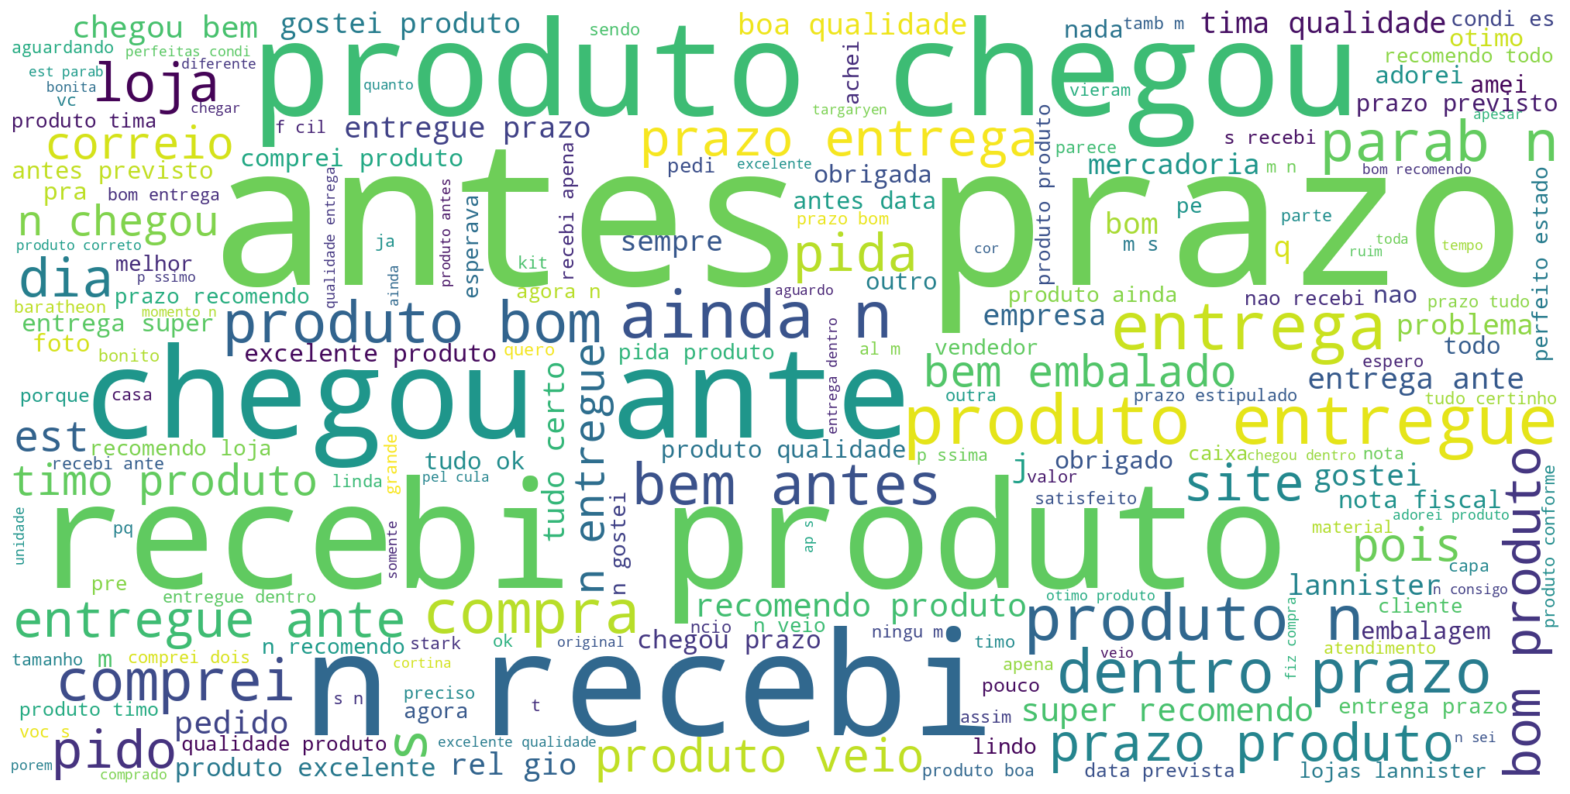

In [ ]:
# Visualizing the cleaned reviews data(uncomment to see)
# comments

#Using wordcloud to visualize the comments
unique_string=(" ").join(comments)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [ ]:
# Using CountVectorizer to get the most important unigrams
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'comments' is a list or a series of text data
co = CountVectorizer(ngram_range=(1, 1))
counts = co.fit_transform(comments)

# Use get_feature_names_out instead of get_feature_names
important_unigrams = pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names_out()).T.sort_values(0, ascending=False).head(50)


In [ ]:
important_unigrams

,0
produto,18866
prazo,8543
entrega,6683
antes,5655
chegou,5643
recebi,5464
bom,4637
recomendo,4362
entregue,3899
veio,3362


In [ ]:
# Using CountVectorizer to get the most important trigrams
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(comments)
important_trigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False).head(50)

In [ ]:
important_trigrams

,0
chegou antes prazo,1112
bem antes prazo,708
entregue antes prazo,608
produto chegou antes,448
entrega antes prazo,433
chegou bem antes,417
produto entregue antes,374
entrega super pida,297
antes prazo previsto,287
ainda recebi produto,261


In [ ]:
# Next, we reset the index, rename the columns and apply the translate module to get the english translations
important_trigrams=important_trigrams.reset_index()
important_trigrams.rename(columns={'index':'trigrams',0:'frequency'},inplace=True)


In [ ]:
important_trigrams

,trigrams,frequency
0,chegou antes prazo,1112
1,bem antes prazo,708
2,entregue antes prazo,608
3,produto chegou antes,448
4,entrega antes prazo,433
5,chegou bem antes,417
6,produto entregue antes,374
7,entrega super pida,297
8,antes prazo previsto,287
9,ainda recebi produto,261


Observações
1. Dos unigramas, bigramas e trigramas acima, podemos **afirmar com segurança que a maioria dos clientes ficou satisfeita com o serviço de entrega, alguns outros ficaram muito satisfeitos com a qualidade dos produtos.**
2. No entanto, existem **outros que não ficaram satisfeitos** com os serviços prestados e gostaríamos de **aprofundar** esta anomalia.
Traçando as pontuações da revisão antes e depois de remover os valores NaN

<Axes: ylabel='count'>

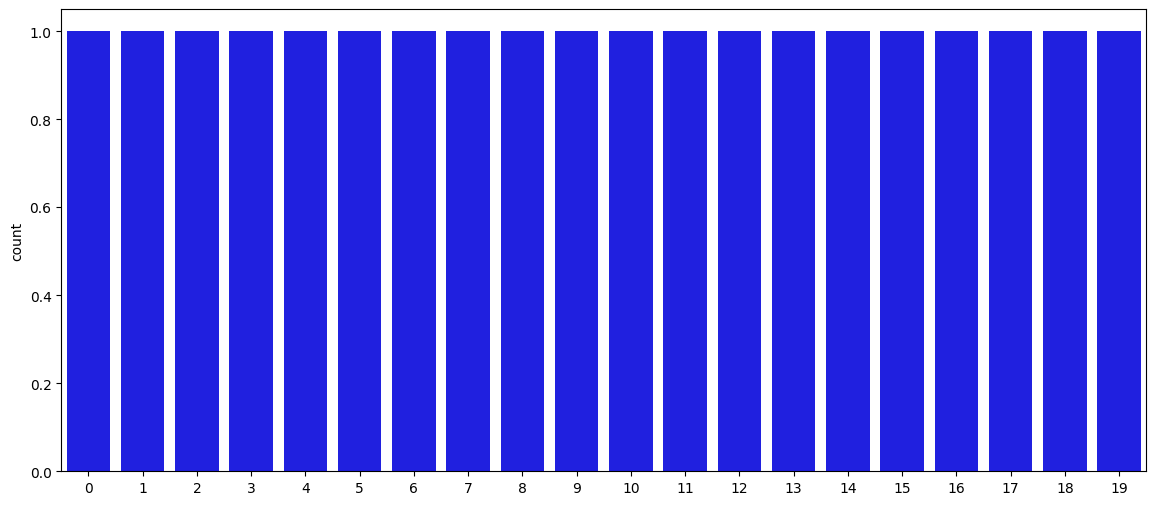

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'review_df' is your DataFrame and it has a column 'review_score'
plt.figure(figsize=(14, 6))
sns.countplot(review_df['review_score'], color='blue')

# Additional plotting or DataFrame operations if needed


In [ ]:
# After removing NaN values
plt.figure(figsize = (14,6))
sns.countplot(review_data['review_score'], color= 'Green')

NameError: name 'review_data' is not defined

<Figure size 1400x600 with 0 Axes>

No gráfico acima, após remover os valores NaN, cerca de 10.000 pessoas deram avaliações de 1 estrela, enquanto um pouco mais de 20.000 pessoas deram avaliações de 5 estrelas, o que significa que:
1. Cerca de 36% dos revisores de 5 estrelas deram comentários, enquanto 79% dos revisores de 1 estrela deram comentários, então um cliente era mais propenso a fazer comentários quando ele / ela estava insatisfeito.
2. Para entender adequadamente os clientes insatisfeitos, construiríamos um modelo de análise de sentimento que classificaria esses sentimentos. Mas antes de fazermos isso, precisamos também dar uma olhada nos títulos das avaliações.

In [ ]:
import nltk
from nltk.corpus import stopwords

# Ensure you have downloaded the stopwords corpus
nltk.download('stopwords')

# Processing the reviews titles data
comments_titles = []
stop_words = set(stopwords.words('portuguese'))

# Continue with your processing


# Processing the reviews titles data
comments_titles = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data_title:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments

    comments_titles.append(' '.join(filtered_result))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'review_data_title' is not defined

In [ ]:
comments_titles

[]

In [ ]:
#Using wordcloud to visualize the comments titles
unique_string=(" ").join(comments_titles)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


NameError: name 'WordCloud' is not defined

In [ ]:
# Using CountVectorizer to get the most important unigrams
co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(comments_titles)
important_unigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

NameError: name 'CountVectorizer' is not defined

In [ ]:
important_unigrams_title

In [ ]:
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(comments_titles)
important_bigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [ ]:
important_bigrams_title

In [ ]:
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(comments_titles)
important_trigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [ ]:
important_trigrams_title

Uma **sacada** massa seria pedir pelo menos 3 ou 4 palavras para os clientes, visto que com tri-grama a gente já consegue se aprofundar bastante quanto a satisfação ou não do cliente bem como o problema real ocorrido.

In [ ]:
# Getting the number of words by splitting them by a space
words_per_review = review_data.review_comment_message.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Em seguida, leríamos nossos dados e realizaríamos algumas modificações iniciais no EDA e no conjunto de dados. O conjunto de dados de revisão tem uma quantidade significativa de valores NaN no texto e no título das revisões, portanto, teríamos certeza de eliminar esses valores ausentes e redefinir o índice.

Assim como as tarefas normais do dia-a-dia da PNL, precisamos implementar algumas etapas de pré-processamento necessárias que envolvem; transformar os dados das revisões removendo stopwords, usando o módulo de expressão regular para aceitar apenas letras, tokenizando o texto e tornando todas as palavras em minúsculas para consistência. Nesse caso, teríamos que remover palavras irrelevantes em português.

In [ ]:
# Checking the percentage of the review scores. 3 and 4 are the smallest scores here.
percent_scores = 100 * review_data['review_score'].value_counts()/len(review_data)
percent_scores


# 4° Máquina Preditiva de Análise de Sentimentos



Este seria um caso de aprendizado supervisionado, portanto, teríamos que criar uma nova coluna representando a pontuação de sentimento (1 ou 0). 1 é para palavras positivas e 0, para palavras negativas. Excluiríamos a pontuação de revisão de 3 pontos porque representa neutra e incluiríamos as pontuações de 1 e 2 como palavras negativas e as pontuações de 4 e 5 na revisão para palavras positivas.

In [ ]:
# Mapping the ratings
review_data['Sentiment_rating'] = np.where(review_data.review_score > 3,1,0)

# Removing neutral reviews
review_data = review_data[review_data.review_score != 3]

# Printing the counts of each class
review_data['Sentiment_rating'].value_counts()

1    26680
0    11408
Name: Sentiment_rating, dtype: int64

In [ ]:
# Having a look, Rows having 3 as review scores have been removed.
review_data.head()
review_data['Sentiment_rating'].shape

In [ ]:
comments = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments

    comments.append(' '.join(filtered_result))

In [ ]:
co_counts = CountVectorizer(stop_words =set(stopwords.words('portuguese')),
                             ngram_range=(1,4)) # unigrams to trigrams

co_data = co_counts.fit_transform(comments)

In [ ]:
co_data

<38088x422326 sparse matrix of type '<class 'numpy.int64'>'
	with 870129 stored elements in Compressed Sparse Row format>

In [ ]:
# Splitting the sentiment scores column into train and test sets
X_train_co, X_test_co, y_train_co, y_test_co= train_test_split(co_data,
                                                                    review_data['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 7)

In [ ]:
y_test_co.value_counts()/y_test_co.shape[0]
# 70% of sentiments are classified as positive
# 30% of sentiments are classified as negative

1    0.702678
0    0.297322
Name: Sentiment_rating, dtype: float64

In [ ]:
# Defining and training the model
lr_model = LogisticRegression()
lr_model.fit(X_train_co, y_train_co)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#5° Avaliação da Máquina

In [ ]:
# Predicting the results
test_pred = lr_model.predict(X_test_co)

print("Acurácia: ", accuracy_score(y_test_co,test_pred))
print("F1 score: ", f1_score(y_test_co,test_pred))




Acurácia:  0.9222893147807824
F1 score:  0.9448994787788533


In [ ]:
print("CM", confusion_matrix(y_test_co,test_pred))

CM [[1950  315]
 [ 277 5076]]


In [ ]:
lr_weights = pd.DataFrame(list(zip(co_counts.get_feature_names(), # get all the n-gram feature names
                                   lr_model.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

Positive_sentiments = pd.DataFrame(lr_weights.sort_values(['weights'], ascending = False)[:15]) # top 15 more important features for positive reviews
Positive_sentiments

In [ ]:
Negative_Sentiments = pd.DataFrame(lr_weights.sort_values(['weights'], ascending = False)[-15:]) # top-15 more important features for negative reviews
Negative_Sentiments

#**Resumão**

Fazemos a análise dos textos de comentários dos clientes e vimos os comentários infelizes feitos por alguns deles. Agora, cabe ao cientista / analista de dados descobrir as melhores maneiras de garantir que esses problemas sejam resolvidos.


Você sabe como realizar uma visualização básica de texto  Existem inúmeras outras ideias que podem ser implementadas neste conjunto de dados, como análise de sentimento e modelagem de tópicos. Quem sabe a gente faz né?

Simbóra!



##Inspiração trabalhos Futuros

Aqui estão algumas inspirações para os resultados possíveis deste conjunto de dados.

**PNL**:

Este conjunto de dados oferece um ambiente supremo para analisar o texto das avaliações em suas múltiplas dimensões.

**Clustering**:

Alguns clientes não escreveram um comentário. Mas por que eles estão felizes ou tão loucos?

**Previsão de vendas**:

Com as informações da data de compra, você poderá prever vendas futuras.

**Desempenho de entrega**:

Você também poderá trabalhar com o desempenho da entrega e encontrar maneiras de otimizar os tempos de entrega.

**Qualidade do produto**:

Divirta-se descobrindo as categorias de produtos que são mais propensas à insatisfação do cliente.

**Engenharia de recursos**:

Crie recursos a partir desse rico conjunto de dados ou anexe algumas informações públicas externas a ele.

**Reconhecimentos**
Obrigado a **Olist** por liberar este conjunto de dados

#Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="378" height="198" src="https://www.youtube.com/embed/EbxV4I0BkXk" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')